In [19]:
# If your version of python isn't the same as mine (3.x.x) things might go wrong
!python --version

Python 3.5.1


In [21]:
# Check you have numpy and matplotlib modules on installed (won't work unless the machine has pip: https://pypi.org/)
!pip install numpy matplotlib

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sys

e = math.e
# Allows me to import my modules
sys.path.append('../../modules')

# The python definition of f(x) for problem 1.
from problem_function import f as problem_function

In [ ]:
from metaheuristics import simulated_annealing

In [4]:
def plot_problem(f, xrange, data, print_data=False): 
    xs = np.linspace(xrange[0], xrange[1], 2*(xrange[1]-xrange[0]))
    ys = np.array([f(i) for i in xs ])
    
    data_length = len(data)
    s_0 = data[0][0]
    s_n = data[-1][0]
    
    temperatures = np.array([round(i[1], 2) for i in data])
    xdata = np.array([i[0] for i in data])
    xplots = np.array([round(i, 2) for i in xdata])
    yplots = np.array([round(f(i), 2) for i in xdata])
    
    # Work out bounds of graph
    height = (f(xrange[0]), f(xrange[1]))
    width = xrange
    midpoint = ((width[0]+width[1])/2, (height[0]+height[1])/2)

    # MatPlotLib
    
    # Plot the results against problem line
    plt.title("Results against problem line")
    plt.plot(xs, ys, '-g', label="f(x)")
    plt.plot(xplots, yplots, "ok", label="Results")
    
    # Annotate first and last plots
    plt.annotate(s="Start point", xy=(xplots[0], yplots[0]), xytext=(midpoint[0], midpoint[1]+70), arrowprops=dict(arrowstyle='->'))
    plt.annotate(s="Finish point", xy=(xplots[-1], yplots[-1]), xytext=(midpoint[0], midpoint[1]+30), arrowprops=dict(arrowstyle='->'))
    
    plt.legend(framealpha=0.4)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()
    if (print_data == True):
        print("Plot data (2DP)\n_____________________________________\nEpoch\tTemperature\tSolution")
        for i in range(data_length):
            print("{}\t{}\t\t({}, {})".format(i, temperatures[i], xplots[i], yplots[i]))
            
# Graph the results (data is a tuple of x's and tempaturature per epoch)

def plot_problem_wth_temp(f, xrange, data, print_data=False): 
    xs = np.linspace(xrange[0], xrange[1], 2*(xrange[1]-xrange[0]))
    ys = np.array([f(i) for i in xs ])
    
    data_length = len(data)
    s_0 = data[0][0]
    s_n = data[-1][0]
    
    temperatures = np.array([round(i[1], 2) for i in data])
    xdata = np.array([i[0] for i in data])
    xplots = np.array([round(i, 2) for i in xdata])
    yplots = np.array([round(f(i), 2) for i in xdata])
    
    # Work out bounds of graph
    height = (f(xrange[0]), f(xrange[1]))
    width = xrange
    midpoint = ((width[0]+width[1])/2, (height[0]+height[1])/2)

    # MatPlotLib
    
    # Plot the problem line
    plt.title("Problem line (only)")
    plt.plot(xs, ys, '-g', label="f(x)")
    plt.legend(framealpha=0.4)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()
    
    # Plot the results against problem line
    plt.title("Results against problem line")
    line = plt.plot(xs, ys, '-g', label="f(x)")
    
    # Plot array_plottings
    tenth_data_length = int(data_length/10)
    for i in range(10):
        colour = ((10-i)/10, 0, i/10)
        label=" "
        if (i == 0):
            label="Epoch (hot temp)"
        if (i == 9):
            label="Epoch (cold temp)"
        plt.plot(xplots[i*tenth_data_length:(i+1)*tenth_data_length], yplots[i*tenth_data_length:(i+1)*tenth_data_length], "o", color=colour, label=label)
    
    # Annotate first and last plots
    plt.annotate(s="Start point", xy=(xplots[0], yplots[0]), xytext=(midpoint[0], midpoint[1]+70), arrowprops=dict(arrowstyle='->'))
    plt.annotate(s="Finish point", xy=(xplots[-1], yplots[-1]), xytext=(midpoint[0], midpoint[1]+30), arrowprops=dict(arrowstyle='->'))
    
    plt.legend(framealpha=0.4)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()
    if (print_data == True):
        print("Plot data (2DP)\n_____________________________________\nEpoch\tTemperature\tSolution")
        for i in range(data_length):
            print("{}\t{}\t\t({}, {})".format(i, temperatures[i], xplots[i], yplots[i]))

In [5]:
s_0 = 120
t_0 = float(1000)
max_i = 50
max_epoch = 50

def neighbourhood_func(x):
    neighbourhood = [x-0.1, x+0.1]
    return neighbourhood


def temp_reduc_func(x):
    return float(0.75*x)


def acc_prob_func(diff, temperature):
    return float(e**(-diff/temperature))


def stop_cond(iteration_counter, max_i, solution, prev_solution, tolerance):
    if (iteration_counter > 0):
        if (iteration_counter >= max_i):
            return True
    return False

In [6]:
# Run simulated annealing (test)
simulated_annealing_results = simulated_annealing(problem_function, s_0,
                    t_0, neighbourhood_func, temp_reduc_func, acc_prob_func, stop_cond, max_i, max_epoch, True)

--------------------------------------------------------------------------------------------
s_0: 120.000000
Epoch: 1	s: 119.900000	t: 1000.000000	Accepted: 1
Epoch: 2	s: 120.000000	t: 1000.000000	Accepted: 1
Epoch: 3	s: 120.100000	t: 1000.000000	Accepted: 1
Epoch: 4	s: 120.200000	t: 1000.000000	Accepted: 1
Epoch: 5	s: 120.300000	t: 1000.000000	Accepted: 1
Epoch: 6	s: 120.200000	t: 1000.000000	Accepted: 1
Epoch: 7	s: 120.300000	t: 1000.000000	Accepted: 1
Epoch: 8	s: 120.400000	t: 1000.000000	Accepted: 1
Epoch: 9	s: 120.300000	t: 1000.000000	Accepted: 1
Epoch: 10	s: 120.400000	t: 1000.000000	Accepted: 1
Epoch: 11	s: 120.300000	t: 1000.000000	Accepted: 1
Epoch: 12	s: 120.200000	t: 1000.000000	Accepted: 1
Epoch: 13	s: 120.300000	t: 1000.000000	Accepted: 1
Epoch: 14	s: 120.400000	t: 1000.000000	Accepted: 1
Epoch: 15	s: 120.300000	t: 1000.000000	Accepted: 1
Epoch: 16	s: 120.200000	t: 1000.000000	Accepted: 1
Epoch: 17	s: 120.100000	t: 1000.000000	Accepted: 1
Epoch: 18	s: 120.200000	t: 1000.0

Epoch: 17	s: 101.100000	t: 0.017878	Accepted: 0
Epoch: 18	s: 101.100000	t: 0.017878	Accepted: 1
Epoch: 19	s: 101.200000	t: 0.017878	Accepted: 0
Epoch: 20	s: 101.200000	t: 0.017878	Accepted: 1
Epoch: 21	s: 101.300000	t: 0.017878	Accepted: 0
Epoch: 22	s: 101.100000	t: 0.017878	Accepted: 1
Epoch: 23	s: 101.000000	t: 0.017878	Accepted: 1
Epoch: 24	s: 101.100000	t: 0.017878	Accepted: 0
Epoch: 25	s: 101.100000	t: 0.017878	Accepted: 0
Epoch: 26	s: 100.900000	t: 0.017878	Accepted: 0
Epoch: 27	s: 100.900000	t: 0.017878	Accepted: 0
Epoch: 28	s: 100.900000	t: 0.017878	Accepted: 1
Epoch: 29	s: 101.000000	t: 0.017878	Accepted: 1
Epoch: 30	s: 101.100000	t: 0.017878	Accepted: 1
Epoch: 31	s: 101.000000	t: 0.017878	Accepted: 1
Epoch: 32	s: 100.900000	t: 0.017878	Accepted: 1
Epoch: 33	s: 101.000000	t: 0.017878	Accepted: 1
Epoch: 34	s: 100.900000	t: 0.017878	Accepted: 0
Epoch: 35	s: 101.100000	t: 0.017878	Accepted: 0
Epoch: 36	s: 100.900000	t: 0.017878	Accepted: 1
Epoch: 37	s: 101.000000	t: 0.017878	Acce

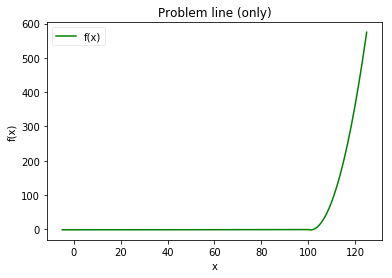

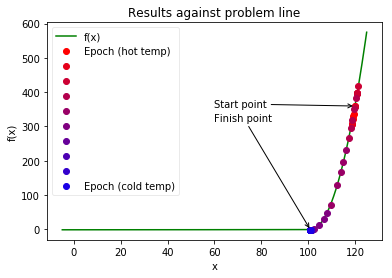

In [17]:
# Graph results
plot_problem_wth_temp(problem_function, (-5, 125), simulated_annealing_results[0])

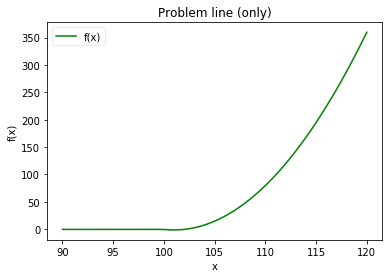

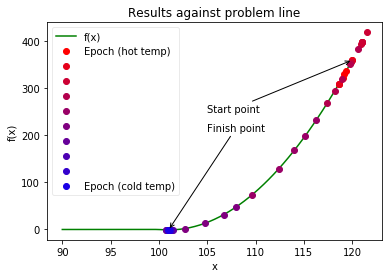

In [18]:
# Graph results
plot_problem_wth_temp(problem_function, (90, 120), simulated_annealing_results[0])

In [5]:
# Imports my plotting module
sys.path.append('../../modules')
import batch_plotting as batch_plt

In [10]:
#Run the simulated annealing on a range of different starting positions

accuracy_wth_respect_to_starting_position = []
for i in range(60):
    start = i*5-50
    s_a_result = simulated_annealing(problem_function, start,
                    t_0, neighbourhood_func, temp_reduc_func, acc_prob_func, stop_cond, max_i, max_epoch)[1]
    accuracy_wth_respect_to_starting_position.append({"x": start, "y": s_a_result, "diff_to_target": abs(101-s_a_result)})


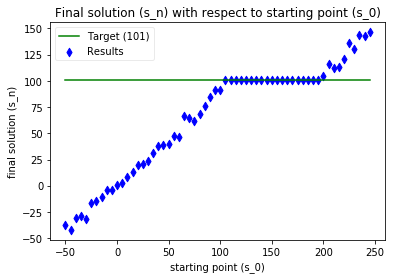

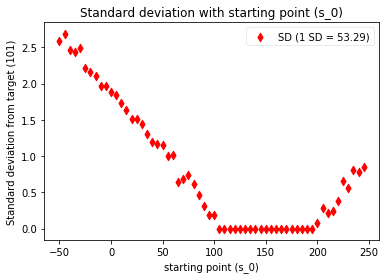

In [11]:
batch_plt.plot_2d_batch_accuracy("final solution (s_n)", "starting point (s_0)", 101, accuracy_wth_respect_to_starting_position)

In [9]:
#Run the simulated annealing on a range of different starting temperatures and temperature reduction gradients

def accuracy_with_temp(s_0):
    results = []
    for i in range(50):
        start_temp = i*20+1
        for j in range(50):
            temp_gradient = (1+j)/52
            def linear_temp_reduction_f(t):
                return t*temp_gradient
            s_a_result = simulated_annealing(problem_function, s_0,
                        start_temp, neighbourhood_func, linear_temp_reduction_f, acc_prob_func, stop_cond, max_i, max_epoch)[1]
            results.append({"x": start_temp, "y": temp_gradient, "z": s_a_result})
    return results
    
#starting at s_0 = 80 (-21 from target)
accuracy_wth_respect_to_temp_at_80 = accuracy_with_temp(80)
#starting at s_0 = 101 (on target)
accuracy_wth_respect_to_temp_at_101 = accuracy_with_temp(101)
#starting at s_0 = 120 (+21 from target)
accuracy_wth_respect_to_temp_at_120 = accuracy_with_temp(120)

When s_0 is 80


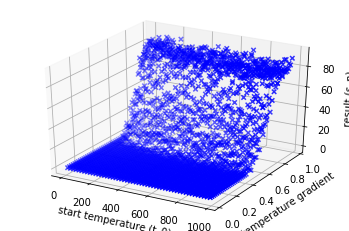

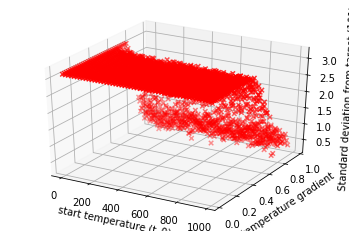

When s_0 is 101


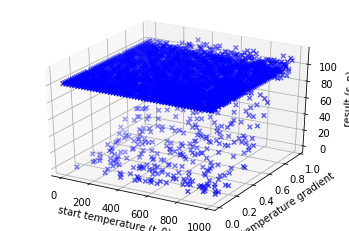

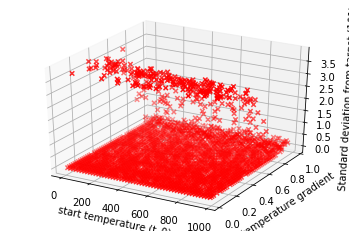

When s_0 is 120


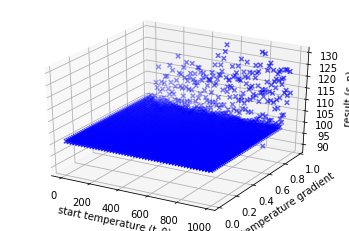

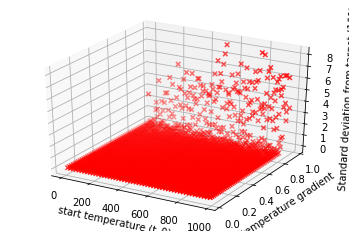

In [10]:
print("When s_0 is 80")
batch_plt.plot_3d_batch_accuracy("start temperature (t_0)", "temperature gradient", "result (s_n)", 101, accuracy_wth_respect_to_temp_at_80)

print("When s_0 is 101")
batch_plt.plot_3d_batch_accuracy("start temperature (t_0)", "temperature gradient", "result (s_n)", 101, accuracy_wth_respect_to_temp_at_101)

print("When s_0 is 120")
batch_plt.plot_3d_batch_accuracy("start temperature (t_0)", "temperature gradient", "result (s_n)", 101, accuracy_wth_respect_to_temp_at_120)

In [11]:
# Create a neighbourhood of pairs amount of points either side of x, which have a difference of step.
# Returns [x-0.1, x+0.1] by default
def flexible_neighbourhood_func(x, step=0.1, pairs=1):
    neighbourhood = []
    for i in range(0, pairs):
        xdiff = step*(i+1)
        neighbourhood.append(x-xdiff)
        neighbourhood.append(x+xdiff)
    return neighbourhood

In [12]:
flexible_neighbourhood_func(1, 0.2, 2)

[0.8, 1.2, 0.6, 1.4]

In [13]:
def accuracy_with_neighbourhood(s_0):
    results = []
    for i in range(1, 11):
        pairs = i
        for j in range(40):
            step = (j+1)/20
            s_a_result = simulated_annealing(problem_function, s_0,
                        t_0, lambda x: flexible_neighbourhood_func(x, step, pairs), temp_reduc_func, acc_prob_func, stop_cond, max_i, max_epoch)[1]
            results.append({"x": step, "y": pairs, "z": s_a_result})
    return results

#starting at s_0 = 80 (-21 from target)
accuracy_wth_respect_to_nh_at_80 = accuracy_with_neighbourhood(80)
#starting at s_0 = 101 (on target)
accuracy_wth_respect_to_nh_at_101 = accuracy_with_neighbourhood(101)
#starting at s_0 = 120 (+21 from target)
accuracy_wth_respect_to_nh_at_120 = accuracy_with_neighbourhood(120)

When s_0 is 80


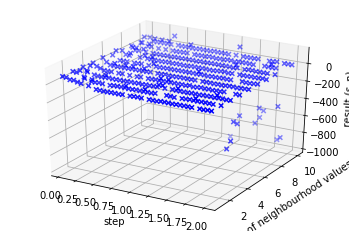

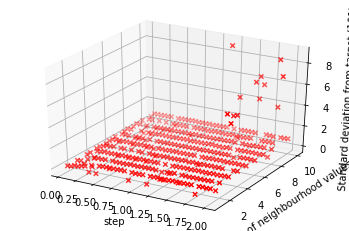

When s_0 is 101


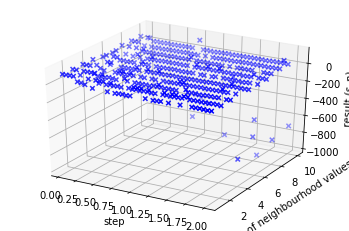

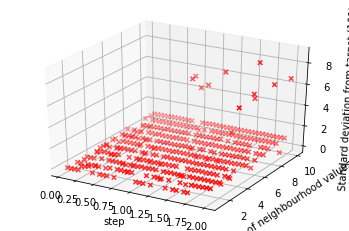

When s_0 is 120


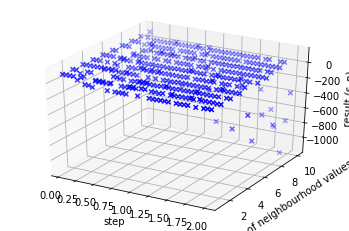

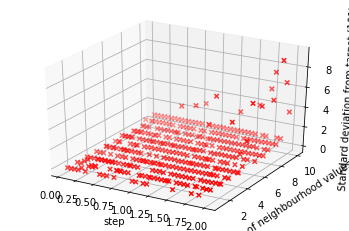

In [15]:
print("When s_0 is 80")
batch_plt.plot_3d_batch_accuracy("step", "pairs of neighbourhood values", "result (s_n)", 101, accuracy_wth_respect_to_nh_at_80)

print("When s_0 is 101")
batch_plt.plot_3d_batch_accuracy("step", "pairs of neighbourhood values", "result (s_n)", 101, accuracy_wth_respect_to_nh_at_101)

print("When s_0 is 120")
batch_plt.plot_3d_batch_accuracy("step", "pairs of neighbourhood values", "result (s_n)", 101, accuracy_wth_respect_to_nh_at_120)

In [34]:
# Batch testing with stop_condition, iterations & epochs
def accuracy_with_stop_condition_i(s_0, stop_condition):
    results = []
    for e in range(1, 11):
        for i in range(50):
            s_a_result = simulated_annealing(problem_function, s_0, t_0, neighbourhood_func, temp_reduc_func, acc_prob_func, stop_condition, i, e)[1]
            results.append({"x": e, "y": i, "z": s_a_result})
    return results

# Batch testing with stop_condition, tolerances & epochs
def accuracy_with_stop_condition_t(s_0, stop_condition):
    results = []
    for e in range(1, 11):
        for t in range(50):
            # Test 0.01 - 0.5 in increments of 0.01
            tol = (t+1)*0.01
            s_a_result = simulated_annealing(problem_function, s_0, t_0, neighbourhood_func, temp_reduc_func, acc_prob_func, stop_condition, max_i, e, False, tol)[1]
            results.append({"x": e, "y": tol, "z": s_a_result})
    return results

#1 Stop condition is iteration based
Example run through


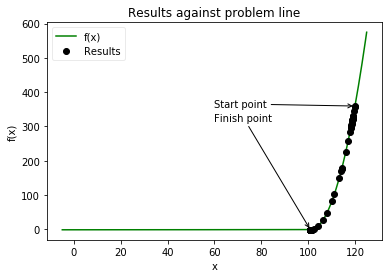

Plot data (2DP)
_____________________________________
Epoch	Temperature	Solution
0	1000.0		(120.0, 359.63)
1	750.0		(119.6, 344.59)
2	562.5		(118.8, 315.47)
3	421.88		(119.2, 329.87)
4	316.41		(119.2, 329.87)
5	237.3		(118.3, 297.92)
6	177.98		(118.2, 294.47)
7	133.48		(119.0, 322.63)
8	100.11		(118.9, 319.04)
9	75.08		(118.5, 304.88)
10	56.31		(118.7, 311.92)
11	42.24		(119.9, 355.84)
12	31.68		(118.9, 319.04)
13	23.76		(119.0, 322.63)
14	17.82		(118.6, 308.39)
15	13.36		(117.9, 284.24)
16	10.02		(117.1, 257.84)
17	7.52		(116.1, 226.64)
18	5.64		(114.3, 175.52)
19	4.23		(114.4, 178.19)
20	3.17		(114.1, 170.24)
21	2.38		(113.3, 149.92)
22	1.78		(111.2, 102.67)
23	1.34		(110.2, 83.27)
24	1.0		(108.0, 47.63)
25	0.75		(106.5, 28.88)
26	0.56		(104.3, 9.52)
27	0.42		(102.5, 0.88)
28	0.32		(101.2, -1.33)
29	0.24		(101.0, -1.37)
30	0.18		(101.6, -1.01)
31	0.13		(100.7, -1.28)
32	0.1		(101.5, -1.12)
33	0.08		(101.1, -1.36)
34	0.06		(100.9, -1.36)
35	0.04		(100.9, -1.36)
36	0.03		(101.0, -1.37)

In [24]:
print("#1 Stop condition is iteration based")
def stop_condition_1(i, max_i, s, prev_s, tolerance):
    if (i < max_i):
        return False
    else:
        return True
    
print("Example run through")
sa_results = simulated_annealing(problem_function, s_0, t_0, neighbourhood_func, temp_reduc_func, acc_prob_func, stop_condition_1, max_i, max_epoch)
plot_problem(problem_function, (-5, 125), sa_results[0], True)

Batch testing stop condition with varied iterations and epochs
When s_0 is 80


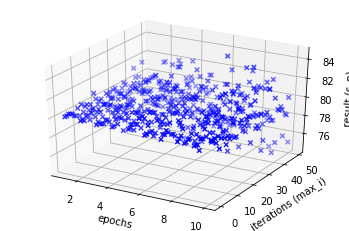

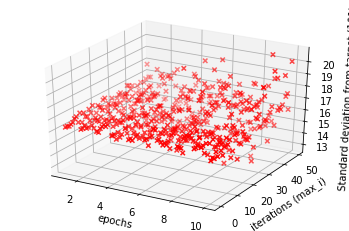

When s_0 is 101


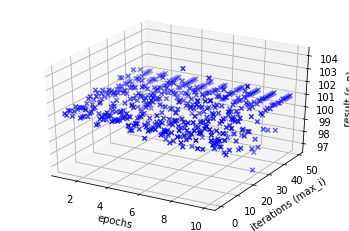

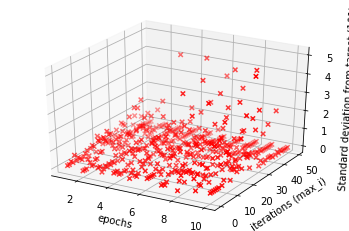

When s_0 is 120


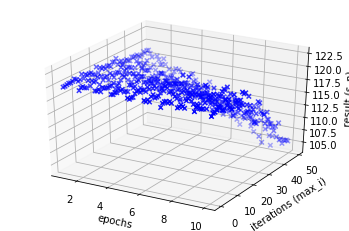

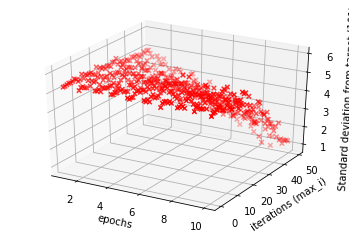

In [43]:
print("Batch testing stop condition with varied iterations and epochs")
#starting at s_0 = 80 (-21 from target)
accuracy_wth_respect_to_sc_at_80_1 = accuracy_with_stop_condition_i(80, stop_condition_1)
#starting at s_0 = 101 (on target)
accuracy_wth_respect_to_sc_at_101_1 = accuracy_with_stop_condition_i(101, stop_condition_1)
#starting at s_0 = 120 (+21 from target)
accuracy_wth_respect_to_sc_at_120_1 = accuracy_with_stop_condition_i(120, stop_condition_1)

print("When s_0 is 80")
batch_plt.plot_3d_batch_accuracy("epochs", "iterations (max_i)", "result (s_n)", 101, accuracy_wth_respect_to_sc_at_80_1)
print("When s_0 is 101")
batch_plt.plot_3d_batch_accuracy("epochs", "iterations (max_i)", "result (s_n)", 101, accuracy_wth_respect_to_sc_at_101_1)
print("When s_0 is 120")
batch_plt.plot_3d_batch_accuracy("epochs", "iterations (max_i)", "result (s_n)", 101, accuracy_wth_respect_to_sc_at_120_1)

#2 Stop condition is solution difference based
Example run through


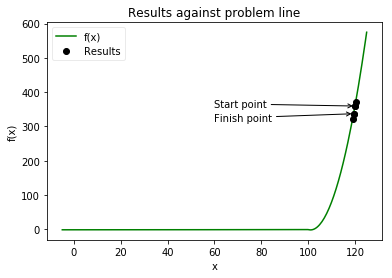

Plot data (2DP)
_____________________________________
Epoch	Temperature	Solution
0	1000.0		(120.0, 359.63)
1	750.0		(119.0, 322.63)
2	562.5		(120.0, 359.63)
3	421.88		(120.3, 371.12)
4	316.41		(119.4, 337.19)
5	237.3		(119.4, 337.19)


In [48]:
print("#2 Stop condition is solution difference based")
def stop_condition_2(i, max_i, s, prev_s, tolerance):
    if (abs(s-prev_s) < tolerance):
        return True
    else:
        return False
    
print("Example run through")
sa_results = simulated_annealing(problem_function, s_0, t_0, neighbourhood_func, temp_reduc_func, acc_prob_func, stop_condition_2, max_i, max_epoch, False, 0.1)
plot_problem(problem_function, (-5, 125), sa_results[0], True)

Batch testing with stop condition with varied tolerances and epochs
When s_0 is 80


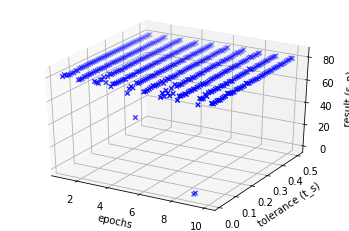

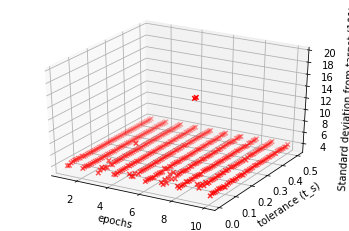

When s_0 is 101


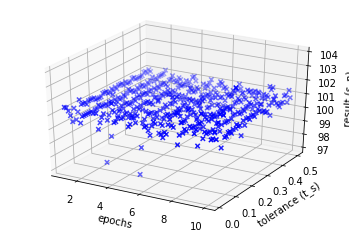

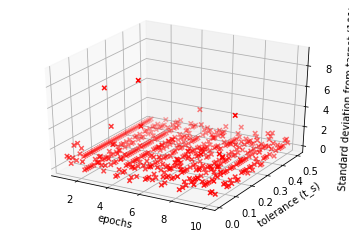

When s_0 is 120


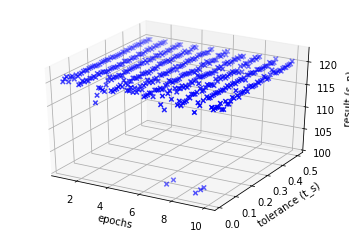

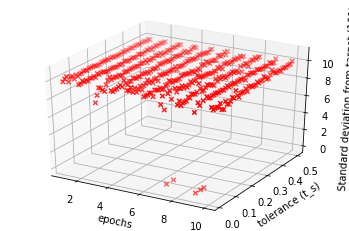

In [45]:
print("Batch testing with stop condition with varied tolerances and epochs")
#starting at s_0 = 80 (-21 from target)
accuracy_wth_respect_to_sc_at_80_2 = accuracy_with_stop_condition_t(80, stop_condition_2)
#starting at s_0 = 101 (on target)
accuracy_wth_respect_to_sc_at_101_2 = accuracy_with_stop_condition_t(101, stop_condition_2)
#starting at s_0 = 120 (+21 from target)
accuracy_wth_respect_to_sc_at_120_2 = accuracy_with_stop_condition_t(120, stop_condition_2)

print("When s_0 is 80")
batch_plt.plot_3d_batch_accuracy("epochs", "tolerance (t_s)", "result (s_n)", 101, accuracy_wth_respect_to_sc_at_80_2)
print("When s_0 is 101")
batch_plt.plot_3d_batch_accuracy("epochs", "tolerance (t_s)", "result (s_n)", 101, accuracy_wth_respect_to_sc_at_101_2)
print("When s_0 is 120")
batch_plt.plot_3d_batch_accuracy("epochs", "tolerance (t_s)", "result (s_n)", 101, accuracy_wth_respect_to_sc_at_120_2)

#3 Stop condition is solution output difference based
Example run through


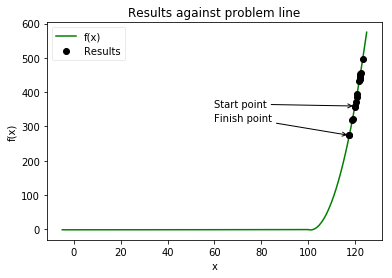

Plot data (2DP)
_____________________________________
Epoch	Temperature	Solution
0	1000.0		(120.0, 359.63)
1	750.0		(120.3, 371.12)
2	562.5		(120.9, 394.64)
3	421.88		(122.1, 443.84)
4	316.41		(122.3, 452.32)
5	237.3		(122.0, 439.63)
6	177.98		(121.8, 431.27)
7	133.48		(122.2, 448.07)
8	100.11		(122.0, 439.63)
9	75.08		(122.1, 443.84)
10	56.31		(123.3, 495.92)
11	42.24		(122.4, 456.59)
12	31.68		(120.7, 386.72)
13	23.76		(119.9, 355.84)
14	17.82		(119.0, 322.63)
15	13.36		(118.9, 319.04)
16	10.02		(117.6, 274.19)
17	7.52		(117.6, 274.19)


In [51]:
print("#3 Stop condition is solution output difference based")
def stop_condition_3(i, max_i, s, prev_s, tolerance):
    if (abs(problem_function(s)-problem_function(prev_s)) < tolerance):
        return True
    else:
        return False
    
print("Example run through")
sa_results = simulated_annealing(problem_function, s_0, t_0, neighbourhood_func, temp_reduc_func, acc_prob_func, stop_condition_3, max_i, max_epoch, False, 0.01)
plot_problem(problem_function, (-5, 125), sa_results[0], True)

Batch testing stop condition with varied tolerances and epochs
When s_0 is 80


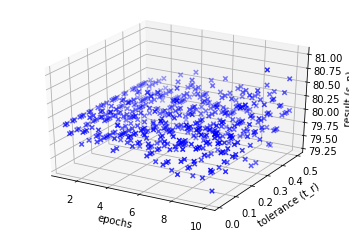

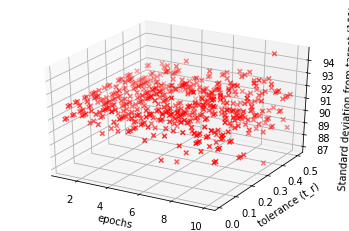

When s_0 is 101


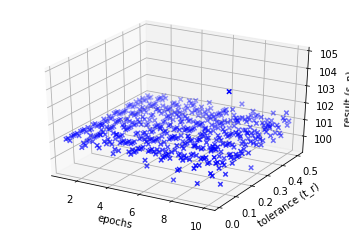

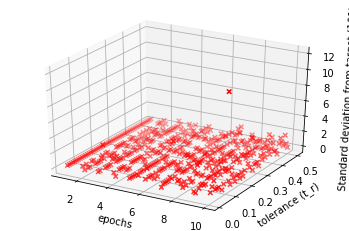

When s_0 is 120


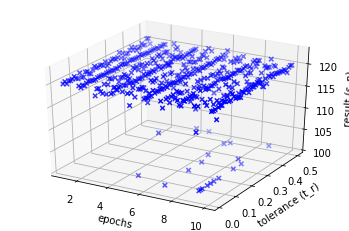

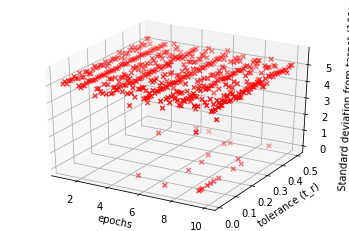

In [47]:
print("Batch testing stop condition with varied tolerances and epochs")
#starting at s_0 = 80 (-21 from target)
accuracy_wth_respect_to_sc_at_80_3 = accuracy_with_stop_condition_t(80, stop_condition_3)
#starting at s_0 = 101 (on target)
accuracy_wth_respect_to_sc_at_101_3 = accuracy_with_stop_condition_t(101, stop_condition_3)
#starting at s_0 = 120 (+21 from target)
accuracy_wth_respect_to_sc_at_120_3 = accuracy_with_stop_condition_t(120, stop_condition_3)

print("When s_0 is 80")
batch_plt.plot_3d_batch_accuracy("epochs", "tolerance (t_r)", "result (s_n)", 101, accuracy_wth_respect_to_sc_at_80_3)
print("When s_0 is 101")
batch_plt.plot_3d_batch_accuracy("epochs", "tolerance (t_r)", "result (s_n)", 101, accuracy_wth_respect_to_sc_at_101_3)
print("When s_0 is 120")
batch_plt.plot_3d_batch_accuracy("epochs", "tolerance (t_r)", "result (s_n)", 101, accuracy_wth_respect_to_sc_at_120_3)